In [965]:
# Import libraries
import math
import pandas_datareader as web
import  numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import numpy as np
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [966]:
# Description: This program predicts the price of Bitcoin for the next 30 days


In [968]:

import pandas_datareader.data as web
import datetime    

start = datetime.datetime(2000, 1, 3)
end = datetime.datetime(2021, 4, 15)
df = web.DataReader("MSFT", 'yahoo', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['date'] = dates


In [969]:
df.reset_index(inplace=True,drop=False)

In [970]:
df['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5350   2021-04-09
5351   2021-04-12
5352   2021-04-13
5353   2021-04-14
5354   2021-04-15
Name: Date, Length: 5355, dtype: datetime64[ns]

In [971]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,37.017384,2000-01-03
1,2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.766914,2000-01-04
2,2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,36.144032,2000-01-05
3,2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,34.933285,2000-01-06
4,2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,35.389793,2000-01-07
...,...,...,...,...,...,...,...,...
5350,2021-04-09,255.990005,252.440002,252.869995,255.850006,24315700.0,255.850006,2021-04-09
5351,2021-04-12,257.670013,254.619995,254.710007,255.910004,27148700.0,255.910004,2021-04-12
5352,2021-04-13,259.190002,256.829987,257.260010,258.489990,23837500.0,258.489990,2021-04-13
5353,2021-04-14,258.829987,255.160004,257.480011,255.589996,23070900.0,255.589996,2021-04-14


In [972]:
df.head(7)

,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2000-01-03,59.31250,56.00000,58.68750,58.28125,53228400.0,37.017384,2000-01-03
1,2000-01-04,58.56250,56.12500,56.78125,56.31250,54119000.0,35.766914,2000-01-04
2,2000-01-05,58.18750,54.68750,55.56250,56.90625,64059600.0,36.144032,2000-01-05
3,2000-01-06,56.93750,54.18750,56.09375,55.00000,54976600.0,34.933285,2000-01-06
4,2000-01-07,56.12500,53.65625,54.31250,55.71875,62013600.0,35.389793,2000-01-07
5,2000-01-10,56.84375,55.68750,56.71875,56.12500,44963600.0,35.647823,2000-01-10
6,2000-01-11,57.12500,54.34375,55.75000,54.68750,46743600.0,34.734791,2000-01-11


In [973]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])



In [905]:
#Variables for training
# cols = list(df)[0:1]


In [974]:
#Variables for training
cols = list(df)[1:6]

In [975]:
cols

['High', 'Low', 'Open', 'Close', 'Volume']

In [976]:
df_for_training = df[cols].astype(float)

<AxesSubplot:>

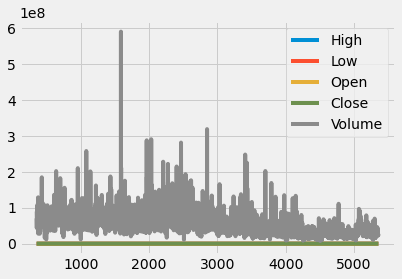

In [977]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [978]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)



In [979]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).
trainX = []
trainY = []

In [980]:
n_future = 1 # Number of days we want to predict into the future
n_past = 14 # Number of past days we want to use to predict the future


for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (5341, 14, 5).
trainY shape == (5341, 1).


In [981]:
# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 14, 64)            17920     
_________________________________________________________________
lstm_105 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_52 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [982]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)



Epoch 1/10
301/301 [==============================] - 6s 13ms/step - loss: 0.0368 - val_loss: 0.1644
Epoch 2/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0068 - val_loss: 0.2609
Epoch 3/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0064 - val_loss: 0.0157
Epoch 4/10
301/301 [==============================] - 4s 12ms/step - loss: 0.0054 - val_loss: 0.3211
Epoch 5/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0062 - val_loss: 0.2325
Epoch 6/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0060 - val_loss: 0.2453
Epoch 7/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0055 - val_loss: 0.1960
Epoch 8/10
301/301 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.3863
Epoch 9/10
301/301 [==============================] - 3s 11ms/step - loss: 0.0049 - val_loss: 0.3271
Epoch 10/10
301/301 [==============================] - 3s 12ms/step - loss: 0.0046 - val_lo

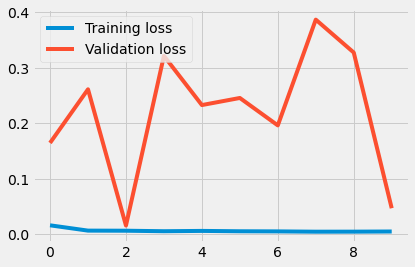

In [983]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [985]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future= 9 #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

In [986]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


In [987]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


<ipython-input-988-a30259528c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit k

<AxesSubplot:xlabel='Date', ylabel='Close'>

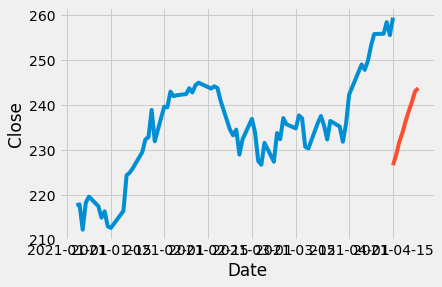

In [988]:
original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-1-1']

sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])

In [989]:
df_forecast.head(21)


,Date,Close
0,2021-04-15,226.625793
1,2021-04-16,228.906174
2,2021-04-17,231.790161
3,2021-04-18,233.825180
4,2021-04-19,236.386337
5,2021-04-20,238.617310
6,2021-04-21,240.620651
7,2021-04-22,243.002075
8,2021-04-23,243.796829
